Define constants. **These may be different for you.**

In [1]:
DATA_PATH = '~/Desktop/honours/sdss_dr7_photometry_source.csv.gz'

In [18]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import sklearn.gaussian_process

sys.path.insert(1, '..')
import splitter

%matplotlib inline

In [12]:
data = splitter.load(DATA_PATH)
(train_X, train_y), (test_X, test_y) = splitter.split(data, 1000, 100)

In [13]:
def preprocess_sgd(train_X, train_y, test_X):
    kernel = sklearn.gaussian_process.kernels.Matern()
    subset = train_X[:1000]
    sgd_train_X = kernel(train_X, subset)
    sgd_test_X = kernel(test_X, subset)
    return sgd_train_X, sgd_test_X

In [14]:
sgd_train_X, sgd_test_X = preprocess_sgd(train_X, train_y, test_X)

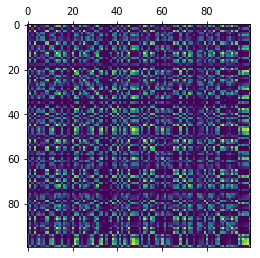

In [15]:
approximate_kernel = sgd_test_X.dot(sgd_test_X.T)
plt.matshow(approximate_kernel)

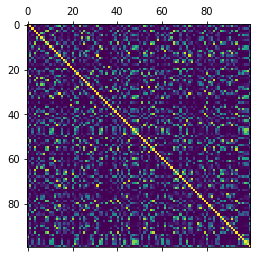

In [17]:
actual_kernel = sklearn.gaussian_process.kernels.Matern()(test_X, test_X)
plt.matshow(actual_kernel)

In [19]:
np.linalg.norm(actual_kernel - approximate_kernel)

2867.1757516721705

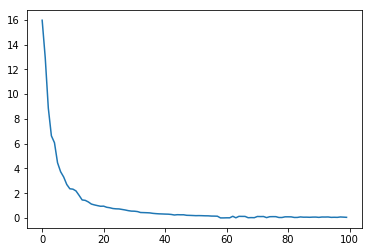

In [23]:
actual_eig = np.linalg.eig(actual_kernel)[0]
plt.plot(range(len(actual_eig)), actual_eig)

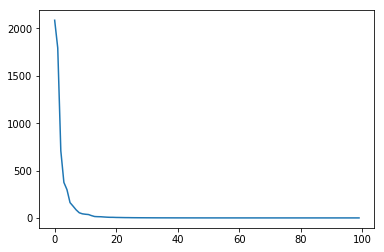

In [24]:
approximate_eig = np.linalg.eig(approximate_kernel)[0]
plt.plot(range(len(approximate_eig)), approximate_eig)